In [1]:
import os
import pandas as pd
import matplotlib
import numpy as np
import scipy.stats as st

os.getcwd()
os.chdir('C:\\Users\meric\Desktop\codes\project')
os.listdir()
# dataset=pd.read_csv('USD_TRY.csv')

dataset=pd.read_excel('ALTIN_TRY.xlsx',sheet_name='Sheet1')

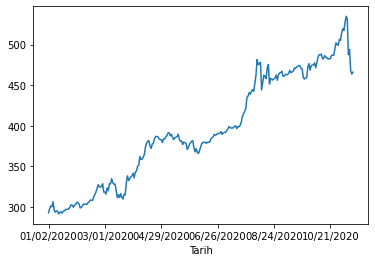

In [2]:
seri = pd.Series(dataset['Kur'].values, index= pd.to_datetime(dataset['Tarih']).dt.strftime('%m/%d/%Y'))
seri.plot()

In [14]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.api import  SimpleExpSmoothing, Holt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR

# df['Kur'].plot()
# plt.show()

df_train = seri.iloc[:-11]
df_test = seri.iloc[-11:]

ModelDict ={'Model':[],'Fitted':[]}

#döngüye sokucam 0-22 index 23 kayıt
for i in range(2,25):    
    ModelDict["Model"].append(HWES(df_train,trend="add",seasonal_periods=i,seasonal="mul"))
    ModelDict["Fitted"].append(ModelDict["Model"][i-2].fit(optimized=True))
#     print(i) 2-24


    
# model1 = HWES(seri.values,trend="add",seasonal_periods=4,seasonal="mul")
# fitted1 = model1.fit(optimized=True)
# forecast1 = fitted1.forecast(steps=12)
    
ModelPredictDict ={'Model':[],'Forecast':[]}    


for i in range(0,22): 
     ModelPredictDict["Model"].append("Model"+str(i+1))
     ModelPredictDict["Forecast"].append(ModelDict["Fitted"][i].forecast(steps=12).values)

# # print(ModelPredictDict["Forecast"][0][12])
    
ModelPredictDict2 ={'Model':[],'Forecast':[]}        

# DataFrame'e atmak için ModelPredictDict'den forecast'leri sırayla çekiyorum
for i in range(0,22): 
    for j in range(0,11): 
      ModelPredictDict2["Model"].append("Model"+str(i+1))
      ModelPredictDict2["Forecast"].append(ModelPredictDict["Forecast"][i][j])

# print(ModelPredictDict2)

df_forecasts=pd.DataFrame.from_dict(ModelPredictDict2)
print(df_forecasts)




       Model    Forecast
0     Model1  506.559415
1     Model1  507.003426
2     Model1  508.200277
3     Model1  508.643071
4     Model1  509.841139
..       ...         ...
237  Model22  513.525261
238  Model22  512.473331
239  Model22  513.827006
240  Model22  514.015407
241  Model22  514.886281

[242 rows x 2 columns]


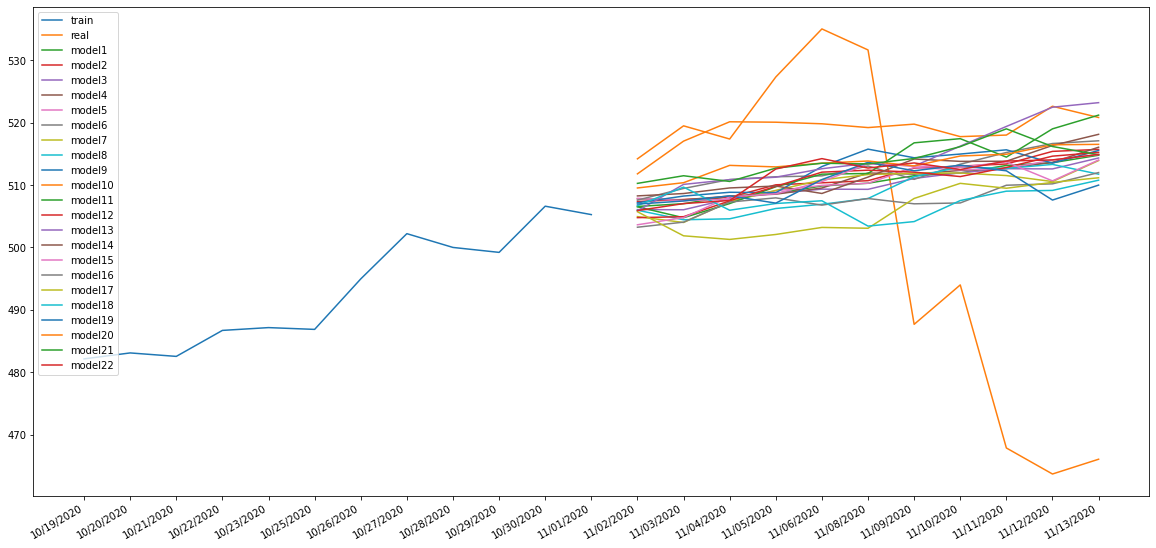

In [15]:
df_train_plot=df_train.iloc[-12:]


#Plotting multiple sets of data
plt.figure(figsize=(20,10))

plt.plot(df_train_plot.index,df_train_plot.values,label='train') # Setting up legends
plt.plot(df_test.index,df_test.values,label='real') # Setting up legends
for i in range (0,22):
 plt.plot(df_test.index,df_forecasts.loc[df_forecasts['Model'].isin(["Model"+str(i+1)])]['Forecast'],label='model'+str(i+1)) # Setting up legends


# # plt.xlabel("X - Axis")
# # plt.ylabel("Y - Axis")

plt.legend(loc=2) #legend location : https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html
plt.gcf().autofmt_xdate() # x ekseni format düzenlemesi
plt.show()

In [16]:
df_test2=pd.DataFrame(df_test.to_frame().values,columns=["Actual"])
df_test2


,Actual
0,514.184
1,519.466
2,517.357
3,527.284
4,534.981
5,531.615
6,487.689
7,494.000
8,467.898
9,463.730


In [17]:
df_actual=pd.concat([df_test2]*22,ignore_index=True)
df_forecasts2=pd.merge(df_forecasts, df_actual, left_index=True, right_index=True)
df_forecasts2


,Model,Forecast,Actual
0,Model1,506.559415,514.184
1,Model1,507.003426,519.466
2,Model1,508.200277,517.357
3,Model1,508.643071,527.284
4,Model1,509.841139,534.981
...,...,...,...
237,Model22,513.525261,487.689
238,Model22,512.473331,494.000
239,Model22,513.827006,467.898
240,Model22,514.015407,463.730


In [18]:
df_forecasts2["Fark"]=df_forecasts2["Actual"]-df_forecasts2["Forecast"]
df_forecasts2["Fark2"]=df_forecasts2["Fark"]*df_forecasts2["Fark"]
df_forecasts2

,Model,Forecast,Actual,Fark,Fark2
0,Model1,506.559415,514.184,7.624585,58.134294
1,Model1,507.003426,519.466,12.462574,155.315750
2,Model1,508.200277,517.357,9.156723,83.845570
3,Model1,508.643071,527.284,18.640929,347.484239
4,Model1,509.841139,534.981,25.139861,632.012588
...,...,...,...,...,...
237,Model22,513.525261,487.689,-25.836261,667.512372
238,Model22,512.473331,494.000,-18.473331,341.263956
239,Model22,513.827006,467.898,-45.929006,2109.473573
240,Model22,514.015407,463.730,-50.285407,2528.622138


In [19]:
new_df=df_forecasts2.groupby("Model")["Fark2"].sum().reset_index()
new_df

,Model,Fark2
0,Model1,9516.241329
1,Model10,11015.097089
2,Model11,11270.165315
3,Model12,9512.722869
4,Model13,11777.880848
5,Model14,10296.360403
6,Model15,9281.906607
7,Model16,8771.583528
8,Model17,9708.835610
9,Model18,8443.516912


In [20]:
new_df = new_df.sort_values(by = ['Fark2'], ascending=[True])
new_df

,Model,Fark2
10,Model19,8382.163095
9,Model18,8443.516912
7,Model16,8771.583528
19,Model7,9022.205340
6,Model15,9281.906607
14,Model22,9353.103560
15,Model3,9417.588081
3,Model12,9512.722869
0,Model1,9516.241329
16,Model4,9553.330683


In [66]:
df_top5=pd.DataFrame(new_df["Model"].iloc[:5].values,columns=["Models"])
# df_top5=pd.DataFrame(new_df["Model"].iloc[8:10].values,columns=["Models"])
df_top5

,Models
0,Model19
1,Model18
2,Model16
3,Model7
4,Model15


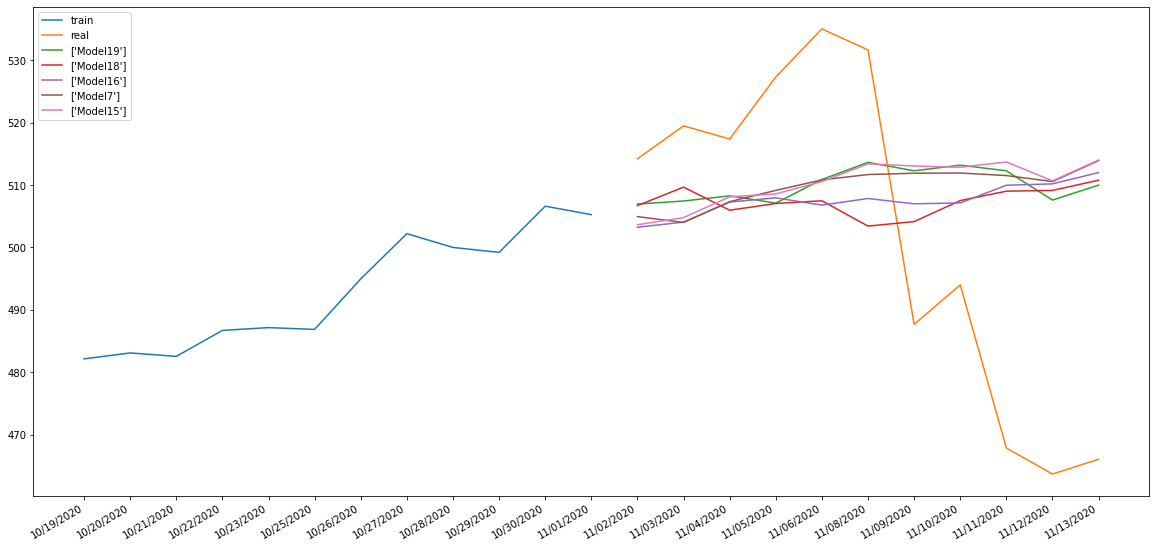

In [68]:
df_train_plot=df_train.iloc[-12:]


#Plotting multiple sets of data
plt.figure(figsize=(20,10))

plt.plot(df_train_plot.index,df_train_plot.values,label='train') # Setting up legends
plt.plot(df_test.index,df_test.values,label='real') # Setting up legends

for i in range(0,5):
  plt.plot(df_test.index,df_forecasts.loc[df_forecasts['Model'].isin(df_top5.iloc[i])]['Forecast'],label=df_top5.iloc[i].values) # Setting up legends
  

# # plt.xlabel("X - Axis")
# # plt.ylabel("Y - Axis")

plt.legend(loc=2) #legend location : https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html
plt.gcf().autofmt_xdate() # x ekseni format düzenlemesi
plt.show()

In [91]:

# df_forecasts.loc[df_forecasts['Model'].isin(df_top5['Models'])]

df_forecasts['Is_Best'] = df_forecasts['Model'].isin(df_top5['Models'])
df_forecasts

df_forecasts[df_forecasts['Is_Best']==True]

,Model,Forecast,Is_Best
66,Model7,504.933261,True
67,Model7,503.996130,True
68,Model7,507.323390,True
69,Model7,509.137150,True
70,Model7,510.813987,True
71,Model7,511.668515,True
72,Model7,511.879790,True
73,Model7,511.914388,True
74,Model7,511.506467,True
75,Model7,510.546477,True


## Best Modeller Üzerinden Prediction

In [93]:
for i in range(0,22): 
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
